# Final Project Report

* Class: DS 5100
* Student Name: Lingzhen Zhu
* Student Net ID: qrb2gn
* This URL: https://github.com/Lingzhen718/qrb2gn_ds5100_montecarlo/blob/main/MontecarloSimulation/montecarlo_demo.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/Lingzhen718/qrb2gn_ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import pandas as pd
import numpy as np
from collections import Counter

class Die:
    '''
    Simulates rolling a die with weighted sides.
    
    The DieSimulator class allows you to simulate rolling a die with weighted sides.
    A die has sides, or “faces”, and weights, and can be rolled to select a face.
    Each side contains a unique symbol. Symbols may be all alphabetic or all numeric.
    Normally, dice is “fair” meaning that the each side has an equal weight. An unfair die is one where the weights are unequal.

    The roll method generates random samples based on the weights.
    '''

    def __init__(self, faces):
        '''
        PURPOSE: Initialize a die object with a given list of faces
        
        INPUTS:
        faces      NumPy Array(Items in the array should be unique strings or numbers)      The faces of the die
        
        OUTPUTS:
        None

        NOTES:
        - The weights of each face (W) are initialized to 1
        - The weights with the faces are stored as die status
        '''
        if not isinstance(faces, np.ndarray):
            raise TypeError("Input die faces must be a NumPy array")
        if not all(isinstance(face, (str, int, float, np.number)) for face in faces):
            raise TypeError("Input die faces array must only contain strings or numbers")
        if len(np.unique(faces)) != len(faces):
            raise ValueError("Input die faces array must only contain unique values")
        self.faces = faces
        self.W = np.ones(len(faces))
        self._diedata = pd.DataFrame({'weights': self.W},index = self.faces)

    
    def changeweight(self, face, weight):
        '''
        PURPOSE: Change the weight of a face in the given die

        INPUTS:
        face      String or Numeric (Should be one of the value in face array)      The face to change the weight of
        weight    Numeric (Or castable as numeric; Cannot be negative)              The new weight of the face

        OUTPUTS:
        None

        NOTES:
        - The function will try to change the weight to be float type if the input is not numeric
        - Bothe the weight of the face (W) and the stored die status are changed
        '''
        if face not in self.faces:
            raise IndexError("Input face to change must in the original die faces array")
        if isinstance(weight, (int, float)) == False:
            try:
                weight = float(weight)
            except:
                raise TypeError("Input weight to change must be a number")
        if weight < 0:
            raise TypeError("Input weight to change must be non-negative")
        self._diedata.loc[face] = weight
        self.W = self._diedata['weights'].values
    
    def rolldie(self, N=1):
        '''
        PURPOSE: Roll the die N times (one or more times) according to the given faces and weights (W), and return all the results in a list

        INPUTS:
        N      Integer (Default value is 1; Must be positive)      The number of times to roll the die

        OUTPUTS:
        results      List      The outcomes of all the N times die rolls

        NOTES:
        - The function does not store internally these results
        '''
        if isinstance(N, int) == False or N <= 0:
            raise TypeError("Input number of rolls must be an integer")
        self.result = list(np.random.choice(self.faces, N, p=self._diedata.weights/sum(self._diedata.weights)))
        return self.result
    
    def showdie(self):
        '''
        PURPOSE: Show the current status of the die

        INPUTS:
        None

        OUTPUTS:
        None

        NOTES:
        - The function prints the stored die status
        '''
        return self._diedata.copy()

class Game(Die):
    '''
    Simulates a game with multiple dice for multiple times.

    The Game class allows you to simulate a game consists of rolling of one or more similar dice (Die objects) one or more times.
    Similar dice means each die has the same number of sides and associated faces, but may have its own weights.
    Each game is initialized with a Python list that contains one or more dice.

    The play method plays the game by rolling each die M times.
    The showresults method shows the most recent play results in either wide or narrow form.
    '''

    def __init__(self, dies):
        '''
        PURPOSE: Initialize a game object with a given list of already instantiated similar dice
        
        INPUTS:
        dies      List (Must be instantiated die objects with similar dice)      The dies used for the game
        
        OUTPUTS:
        None
        
        NOTES:
        - This function do not check if the list actually contains Die objects with same faces
        - This function also initializes the results of the game in order to keep the results of most recent play
        '''
        self.dies = dies
        self._results = None
    
    def play(self, M):
        '''
        PURPOSE: Play the game by rolling each die M times

        INPUTS:
        M      Integer (Must be positive)      The number of times to roll each die

        OUTPUTS:
        None

        NOTES:
        - The function stores the results of the game
        '''
        if isinstance(M, int) == False or M <= 0:
            raise TypeError("Input number of rolls must be an integer")
        results = {}
        for index, die in enumerate(self.dies):
            result_onedie = die.rolldie(M)
            results[f'{index}'] = result_onedie
        self._results = pd.DataFrame(results)
        self._results.index = range(1, M+1)
        self._results.index.name = 'Roll Number'
        self._results.columns.name = 'Die Number'

    def showresults(self, form='wide'):
        '''
        PURPOSE: Show the results of the game in either wide or narrow form
        
        INPUTS:
        form      String (Must be either 'wide' or 'narrow')      The form of the results to show
        
        OUTPUTS:
        results      Pandas DataFrame      The results of the game in the given form

        NOTES:
        - The function returns the stored results of the game
        - The function raises error if the game has not been played yet
        - The function raises error if the input form is not 'wide' or 'narrow'
        '''
        if self._results is None:
            raise ValueError("The game has not been played yet")
        else:
            if form != 'wide' and form != 'narrow':
                raise ValueError("Input form option must be either 'wide' or 'narrow' in order to show the results")
            else:
                if form == 'wide':
                    return self._results.copy()
                if form == 'narrow':
                    return pd.DataFrame(self._results.copy().stack()).rename(columns={0:'Face'})

class Analyzer(Game):
    '''
    Analyzes the results of a game.

    The Analyzer class allows you to analyze the results of a game.
    The game must be played first before the analysis.
    The jackpot and face counts per roll method statistically record the occurrence of each face of the die according to certain rules
    The combo count and permutation count method statistically record the combination of all the faces.
    '''
    def __init__(self, games):
        '''
        PURPOSE: Initialize an analyzer object with a given game object
        
        INPUTS:
        games      Game object      The game to analyze
        
        OUTPUTS:
        None
        
        NOTES:
        - This function check if the input is a Game object, and if the game has been played
        - This function also initializes the gameover attribute in order to keep the results for use in later methods
        '''
        if not isinstance(games, Game):
            raise ValueError("Input must be a Game object.")
        if games._results is None:
            raise ValueError("The game has not been played yet")
        self.games = games
        self.gameover = self.games.showresults().copy()
    
    def jackpot(self):
        '''
        PURPOSE: Count the number of jackpots in the game
        
        INPUTS:
        None
        
        OUTPUTS:
        jackpot_count      Integer      The number of jackpots in the game
        
        NOTES:
        - The function first set the jackpot count to 0
        - Jackpot is defined as all the dice showing the same face in a roll
        '''
        self.jackpot_count = 0
        for i in range(1, len(self.gameover)+1):
            if all(m== self.gameover.loc[i][0] for m in self.gameover.loc[i]):
                self.jackpot_count += 1
        return self.jackpot_count
    
    def face_counts_per_roll(self):
        '''
        PURPOSE: Count the number of each face in each roll

        INPUTS:
        None

        OUTPUTS:
        face_count      Pandas DataFrame      The number of each face in each roll

        NOTES:
        - The data frame has an index of the roll number, face values as columns, and count values in the cells
        '''
        self.face_count = self.gameover.apply(lambda row: pd.Series([list(row).count(element) for element in self.games.dies[0].faces]), axis=1)
        self.face_count.columns = self.games.dies[0].faces
        self.face_count.index = self.gameover.index
        self.face_count.columns.name = 'Face'
        return self.face_count
    
    def combo_count(self):
        '''
        PURPOSE: Count the distinct and order-independent combinations of faces rolled, along with their counts
        
        INPUTS:
        None
        
        OUTPUTS:
        combo_count      Pandas DataFrame      The number of each combination of faces in the game
        
        NOTES:
        - The data frame has an multiIndex of distinct combinations and a column for the associated counts
        - The combinations are distinct in the sense that the order of the faces does not matter
        '''
        self.combo = dict(Counter(tuple(sorted(list(self.gameover.loc[i+1]), key=lambda x: str(x))) for i in range(len(self.gameover))))
        return pd.DataFrame(list(self.combo.values()), index=self.combo.keys(),columns=['count'])
    
    def permutation_count(self):
        '''
        PURPOSE: Count the distinct and order-dependent permutations of faces rolled, along with their counts

        INPUTS:
        None

        OUTPUTS:
        permutation_count      Pandas DataFrame      The number of each permutation of faces in the game

        NOTES:
        - The data frame has an multiIndex of distinct permutations and a column for the associated counts
        - The permutations are distinct in the sense that the order of the faces does matter
        '''
        self.permutation = dict(Counter(tuple(list(self.gameover.loc[i+1])) for i in range(len(self.gameover))))
        return pd.DataFrame(list(self.permutation.values()), index=self.permutation.keys(),columns=['count'])

```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
from montecarlo import Die, Game, Analyzer
import unittest
import numpy as np
import pandas as pd

class TestDie(unittest.TestCase):
    def test_Die_init(self):
        face0 = np.array([1,2,3,4,5,6])
        die = Die(face0)
        message = "The die is not created"
        self.assertTrue(np.array_equal(die.faces, face0), message)

    def test_changeweight(self):
        face1 = np.array([1,2,3,4,5,6])
        die1 = Die(face1)
        die1.changeweight(6, 5)
        message1 = "The weight of face has not been changed"
        self.assertEqual(die1.W[5], 5, message1)
    
    def test_rolldie(self):
        face2 = np.array([1,2,3,4,5,6])
        die2 = Die(face2)
        die2.rolldie(2)
        message2 = "The result of die is not in the faces"
        self.assertIn(die2.result[1], die2.faces, message2)

    def test_showdie(self):
        face3 = np.array([1,2,3,4,5,6])
        die3 = Die(face3)
        message3 = "The status of die is not shown"
        dielen = len(die3.showdie())
        self.assertEqual(dielen, 6, message3)
    

    
class TestGame(unittest.TestCase):
    def test_Game_init(self):
        face0 = np.array([1,2,3,4,5,6])
        dies0 = [Die(face0), Die(face0)]
        game0 = Game(dies0)
        message = "The game is not created"
        self.assertEqual(game0.dies, dies0, message)

    def test_play(self):
        face4 = np.array([1,2,3,4,5,6])
        die4 = Die(face4)
        die5 = Die(face4)
        die5.changeweight(6, 5)
        dies1 = [die4, die5]
        game1 = Game(dies1)
        game1.play(5)
        expected = (5,2)
        message4 = "The game is not played"
        self.assertEqual(game1.showresults().shape, expected, message4)
    
    def test_showresults(self):
        face5 = np.array([1,2,3,4,5,6])
        die6 = Die(face5)
        die7 = Die(face5)
        dies2 = [die6, die7]
        game2 = Game(dies2)
        game2.play(5)
        expected = (5,2)
        message5 = "The game is not played"
        self.assertEqual(game2.showresults().shape, expected, message5)


class TestAnalyzer(unittest.TestCase):
    def test_Analyzer_init(self):
        face10 = np.array([1,2,3,4,5,6])
        die16 = Die(face10)
        die17 = Die(face10)
        dies7 = [die16, die17]
        game7 = Game(dies7)
        game7.play(5)
        analyzer0 = Analyzer(game7)
        message = "The analyzer is not created"
        self.assertEqual(analyzer0.games, game7, message)

    def test_jackpot(self):
        face6 = np.array([1,2,3,4,5,6])
        die8 = Die(face6)
        die9 = Die(face6)
        dies3 = [die8, die9]
        game3 = Game(dies3)
        game3.play(5)
        analyzer1 = Analyzer(game3)
        ajresult = analyzer1.jackpot()
        ajresult1 = isinstance(ajresult, int)
        message6 = "The jackpot is not calculated"
        self.assertTrue(ajresult1, message6)

    def test_face_counts_per_roll(self):
        face7 = np.array([1,2,3,4,5,6])
        die10 = Die(face7)
        die11 = Die(face7)
        dies4 = [die10, die11]
        game4 = Game(dies4)
        game4.play(5)
        analyzer2 = Analyzer(game4)
        face_counts = analyzer2.face_counts_per_roll()
        message7 = "The face counts per roll is not calculated"
        self.assertEqual(face_counts.shape, (5,6), message7)
    
    def test_combo_count(self):
        face8 = np.array([1,2,3,4,5,6])
        die12 = Die(face8)
        die13 = Die(face8)
        dies5 = [die12, die13]
        game5 = Game(dies5)
        game5.play(5)
        analyzer3 = Analyzer(game5)
        combo_count1 = analyzer3.combo_count()
        combo_count2 = isinstance(combo_count1, pd.DataFrame)
        message8 = "The combo count is not calculated"
        self.assertTrue(combo_count2, message8)

    def test_permutation_count(self):
        face9 = np.array([1,2,3,4,5,6])
        die14 = Die(face9)
        die15 = Die(face9)
        dies6 = [die14, die15]
        game6 = Game(dies6)
        game6.play(5)
        analyzer4 = Analyzer(game6)
        permutation_count1 = analyzer4.permutation_count()
        permutation_count2 = isinstance(permutation_count1, pd.DataFrame)
        message9 = "The permutation count is not calculated"
        self.assertTrue(permutation_count2, message9)
    
if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

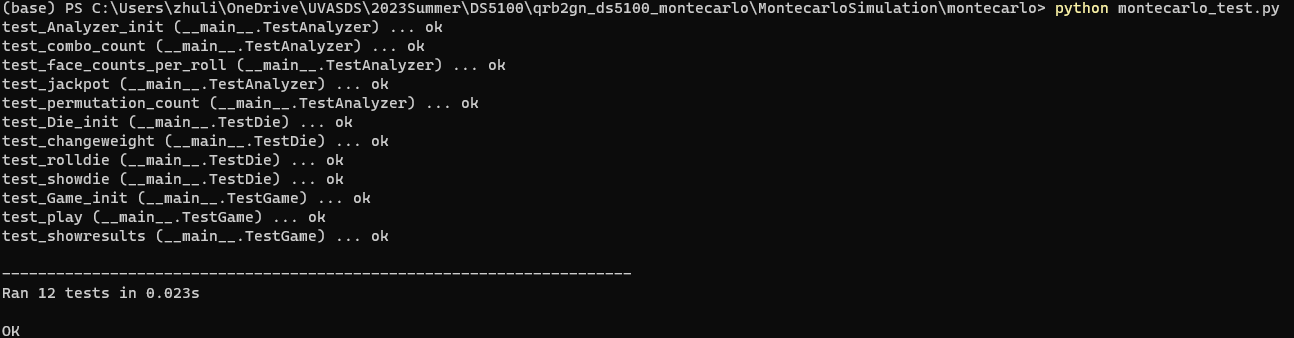

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
from montecarlo import *

Welcome to my module!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Die
            Game
                Analyzer
    
    class Analyzer(Game)
     |  Analyzer(games)
     |  
     |  Analyzes the results of a game.
     |  
     |  The Analyzer class allows you to analyze the results of a game.
     |  The game must be played first before the analysis.
     |  The jackpot and face counts per roll method statistically record the occurrence of each face of the die according to certain rules
     |  The combo count and permutation count method statistically record the combination of all the faces.
     |  
     |  Method resolution order:
     |      Analyzer
     |      Game
     |      Die
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, games)
     |      PURPOSE: Initialize an analyzer object with a given game object
     |      
     |      INPUTS:
     |      games      Game obje

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/Lingzhen718/qrb2gn_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

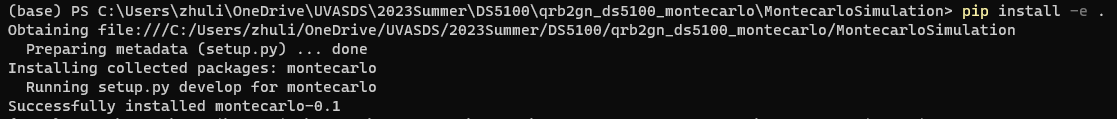

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
face1 = np.array(['H', 'T'])
coin1 = Die(face1)
coin2 = Die(face1)
coin2.changeweight('H', 5)

In [4]:
coin1.showdie()

,weights
H,1.0
T,1.0


In [5]:
coin2.showdie()

,weights
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [6]:
game1 = Game([coin1,coin2])
game1.play(1000)

In [9]:
game1.showresults()

Die Number,0,1
Roll Number,,
1,T,H
2,T,T
3,T,H
4,T,H
5,H,H
...,...,...
996,T,T
997,H,H
998,T,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [7]:
game2 = Game([coin2, coin2])
game2.play(1000)

In [10]:
game2.showresults()

Die Number,0,1
Roll Number,,
1,H,H
2,T,H
3,H,H
4,H,T
5,T,H
...,...,...
996,H,H
997,H,T
998,T,H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [11]:
analyz1 = Analyzer(game1)
analyz2 = Analyzer(game2)

In [12]:
analyz1.jackpot()

494

In [13]:
analyz2.jackpot()

725

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [14]:
frequency1 = analyz1.jackpot()/1000
frequency2 = analyz2.jackpot()/1000
print("The frequency of jackpot in the game1 is: ", frequency1)
print("The frequency of jackpot in the game2 is: ", frequency2)

The frequency of jackpot in the game1 is:  0.494
The frequency of jackpot in the game2 is:  0.725


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Comparison of Jackpot Frequencies')

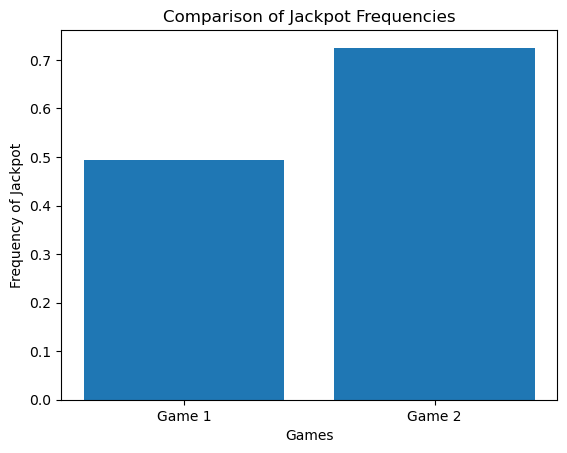

In [15]:
import matplotlib.pyplot as plt
games = ['Game 1', 'Game 2']
frequencies = [frequency1, frequency2]
plt.bar(games, frequencies)
plt.xlabel('Games')
plt.ylabel('Frequency of Jackpot')
plt.title('Comparison of Jackpot Frequencies')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [3]:
face2 = np.array([1, 2, 3, 4, 5, 6])
dice1 = Die(face2)
dice2 = Die(face2)
dice3 = Die(face2)

In [4]:
dice1.showdie()

,weights
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [5]:
dice1.changeweight(6, 5)

In [6]:
dice1.showdie()

,weights
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [7]:
dice2.changeweight(1, 5)

In [8]:
dice2.showdie()

,weights
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [9]:
game3 = Game([dice3, dice3, dice3, dice3, dice3])
game3.play(10000)
game3.showresults()

Die Number,0,1,2,3,4
Roll Number,,,,,
1,1,5,1,4,6
2,5,2,2,1,2
3,1,4,4,2,4
4,4,1,2,6,1
5,5,3,2,1,1
...,...,...,...,...,...
9996,1,3,4,5,5
9997,6,1,5,4,4
9998,6,5,4,1,6


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [10]:
game4 = Game([dice1, dice2, dice3, dice3, dice3])
game4.play(10000)
game4.showresults()

Die Number,0,1,2,3,4
Roll Number,,,,,
1,3,4,6,1,6
2,5,2,6,4,5
3,1,1,1,2,3
4,3,4,5,4,1
5,1,2,2,4,4
...,...,...,...,...,...
9996,6,2,1,6,1
9997,2,5,6,6,3
9998,3,5,4,2,3


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Text(0.5, 1.0, 'Comparison of Jackpot Frequencies')

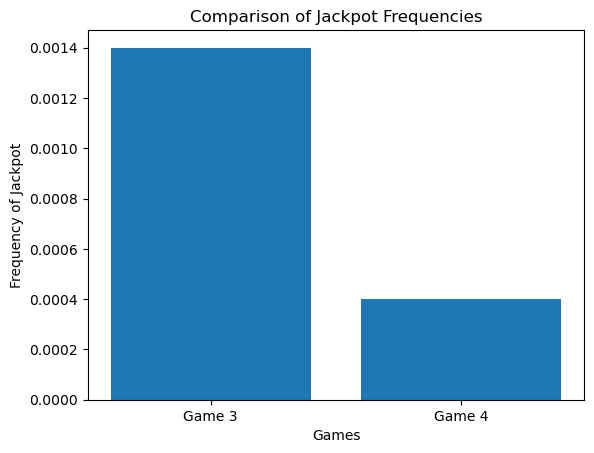

In [13]:
analyz3 = Analyzer(game3)
analyz4 = Analyzer(game4)
frequency3 = analyz3.jackpot()/10000
frequency4 = analyz4.jackpot()/10000
games1 = ['Game 3', 'Game 4']
frequencies1 = [frequency3, frequency4]
plt.bar(games1, frequencies1)
plt.xlabel('Games')
plt.ylabel('Frequency of Jackpot')
plt.title('Comparison of Jackpot Frequencies')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [15]:
import os
os.chdir('C:/Users/zhuli/OneDrive/UVASDS/2023Summer/DS5100/Others')
data = pd.read_csv('english_letters.txt', sep=' ', header=None)
letters = data[0].values
weights = data[1].values

In [18]:
alphabetdie = Die(letters)

In [19]:
for letter, weight in zip(letters, weights):
    alphabetdie.changeweight(letter, weight)

In [21]:
alphabetdie.showdie()

,weights
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [22]:
game5 = Game([alphabetdie, alphabetdie, alphabetdie, alphabetdie])
game5.play(1000)
game5.showresults()

Die Number,0,1,2,3
Roll Number,,,,
1,M,S,E,N
2,H,K,E,A
3,C,H,E,T
4,C,E,G,I
5,U,O,E,F
...,...,...,...,...
996,O,O,R,S
997,N,S,P,S
998,T,R,A,A


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [24]:
analyz5 = Analyzer(game5)
analyz5.permutation_count()

count
M S E N      1
H K E A      1
C H E T      1
  E G I      1
U O E F      1
...        ...
O O R S      1
N S P S      1
T R A A      1
H E A H      1
T E E F      1

[990 rows x 1 columns]

In [29]:
wordlist

count combination  is_word
M S E N      1        MSEN    False
H K E A      1        HKEA    False
C H E T      1        CHET    False
  E G I      1        CEGI    False
U O E F      1        UOEF    False
...        ...         ...      ...
O O R S      1        OORS    False
N S P S      1        NSPS    False
T R A A      1        TRAA    False
H E A H      1        HEAH    False
T E E F      1        TEEF    False

[990 rows x 3 columns]

In [28]:
with open('scrabble_words.txt', 'r') as file:
    vocabulary = set(word.upper() for word in file.read().strip().split('\n'))
wordlist= analyz5.permutation_count().copy()
wordlist['combination'] = wordlist.index.get_level_values(0) + wordlist.index.get_level_values(1) + wordlist.index.get_level_values(2) + wordlist.index.get_level_values(3)
wordlist['is_word'] = wordlist['combination'].apply(lambda x: x in vocabulary)
wordlist_num = wordlist['is_word'].sum()
vocabulary_num = len(vocabulary)
diff = vocabulary_num-wordlist_num
print(f"Number of distinct permutations that are actual English words: {wordlist_num}")
print(f"Number of distinct English words: {vocabulary_num}")
print(f"difference between permutations and vocabulary: {diff}")

Number of distinct permutations that are actual English words: 60
Number of distinct English words: 279496
difference between permutations and vocabulary: 279436


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [31]:
game6 = Game([alphabetdie, alphabetdie, alphabetdie, alphabetdie, alphabetdie])
game6.play(1000)
analyz6 = Analyzer(game6)
wordlist1= analyz6.permutation_count().copy()
wordlist1['combination'] = wordlist1.index.get_level_values(0) + wordlist1.index.get_level_values(1) + wordlist1.index.get_level_values(2) + wordlist1.index.get_level_values(3)
wordlist1['is_word'] = wordlist1['combination'].apply(lambda x: x in vocabulary)
wordlist_num1 = wordlist1['is_word'].sum()
diff1 = vocabulary_num-wordlist_num1
print(f"Number of distinct permutations that are actual English words: {wordlist_num1}")
print(f"Number of distinct English words: {vocabulary_num}")
print(f"difference between permutations and vocabulary: {diff1}")

Number of distinct permutations that are actual English words: 45
Number of distinct English words: 279496
difference between permutations and vocabulary: 279451


***It turns out that 4 dice produce more***

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.